Epoch 1/50
53/53 [==============================] - 3s 12ms/step - loss: 0.0256 - val_loss: 2.6766e-04
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0039 - val_loss: 1.1134e-04
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0029 - val_loss: 3.3559e-04
Epoch 4/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 2.0493e-04
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 4.4326e-04
Epoch 6/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0020 - val_loss: 2.0351e-04
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0018 - val_loss: 2.5734e-04
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 8.5468e-05
Epoch 9/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0016 - val_loss: 3.4487e-04
Epoch 10/50
53/53 [==============================] - 0s 6ms/step - loss: 0.0013 -

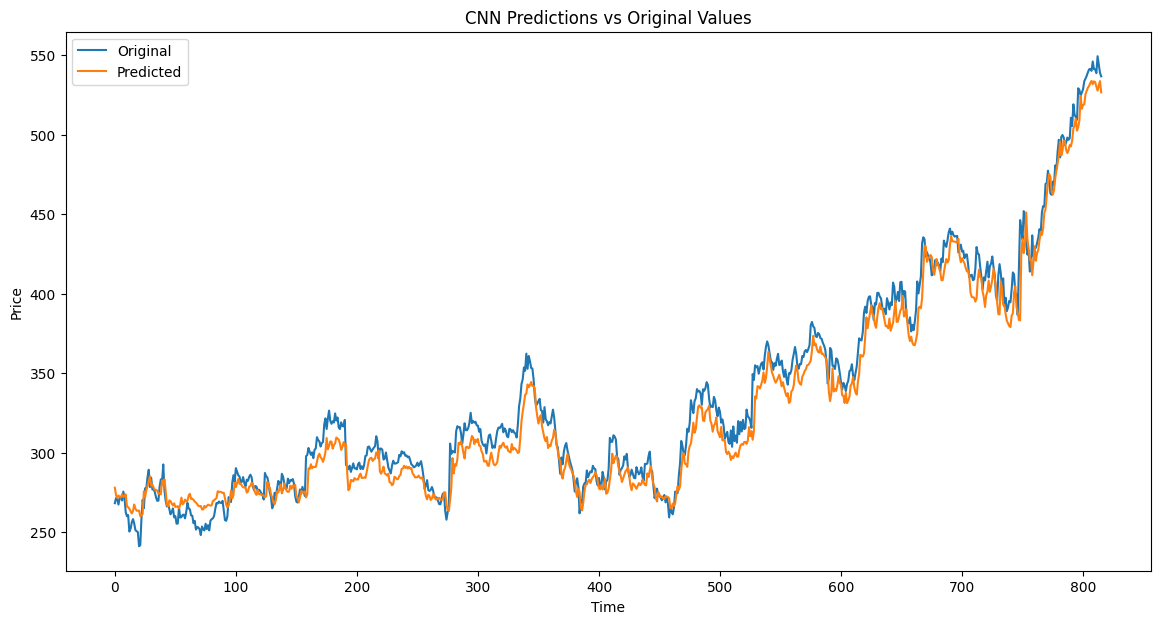

RMSE: 11.593035140556239


In [17]:
# Importing necessary libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('ICICIBANK.csv')

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Scale the data to be values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

# Define the training data length
training_data_len = math.ceil(len(dataset) * 0.7)

# Split the data into training and testing sets
train_data = scaled_data[0:training_data_len, :]
test_data = scaled_data[training_data_len - 30:, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data for CNN input
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Define the CNN model
cnn_model = Sequential()

# Add the first convolutional layer
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))

# Add the max pooling layer
cnn_model.add(MaxPooling1D(pool_size=2))

# Add the flatten layer
cnn_model.add(Flatten())

# Add the first dense layer
cnn_model.add(Dense(units=50, activation='relu'))

# Add the second dense layer
cnn_model.add(Dense(units=50, activation='relu'))

# Add the output layer
cnn_model.add(Dense(units=1))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = cnn_model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Reshape the test data
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Predictions
cnn_predictions = cnn_model.predict(x_test)

# Rescale predictions
cnn_predictions = scaler.inverse_transform(cnn_predictions)

# Calculate RMSE
cnn_rmse = np.sqrt(np.mean((cnn_predictions - y_test)**2))

# Plot the predicted values against the original values
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Original')
plt.plot(cnn_predictions, label='Predicted')
plt.title('CNN Predictions vs Original Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

print("RMSE:", cnn_rmse)
